In [1]:
import pandas as pd

In [2]:
# Read data
full_cell_data = pd.read_csv('data/K562/k562.allele.flt.M_atacrnamerged.tsv', sep='\t')

In [3]:
for i in range(1,10):
    full_cell_data['metacell'] = full_cell_data['metacell'].apply(lambda x: 'G1_0'+str(i) if x=='G1_'+str(i) else x)
    full_cell_data['metacell'] = full_cell_data['metacell'].apply(lambda x: 'G2M_0'+str(i) if x=='G2M_'+str(i) else x)
    full_cell_data['metacell'] = full_cell_data['metacell'].apply(lambda x: 'S_0'+str(i) if x=='S_'+str(i) else x)

In [4]:
pseudotime_vals_G1 = sorted([x for x in list(full_cell_data['metacell'].unique()) if x.startswith('G1')])
pseudotime_vals_S = sorted([x for x in list(full_cell_data['metacell'].unique()) if x.startswith('S')])
pseudotime_vals_G2 = sorted([x for x in list(full_cell_data['metacell'].unique()) if x.startswith('G2')])
pseudotime_vals = pseudotime_vals_G1 + pseudotime_vals_S + pseudotime_vals_G2
pseudotime_proxy = list(range(len(pseudotime_vals)))
pseudotime_dict = {x:y for x,y in zip(pseudotime_vals, pseudotime_proxy)}
# pseudotime_dict_rev = {y:x for x,y in zip(pseudotime_vals, pseudotime_proxy)}

In [5]:
full_cell_data['pseudotime'] = full_cell_data['metacell'].map(pseudotime_dict)

In [6]:
full_cell_data['Phase'] = full_cell_data['metacell'].apply(lambda x: x.split('_')[0])

In [7]:
full_cell_data_G1 = full_cell_data[full_cell_data['Phase']=='G1']
full_cell_data_G2 = full_cell_data[full_cell_data['Phase']=='G2M']
full_cell_data_S = full_cell_data[full_cell_data['Phase']=='S']

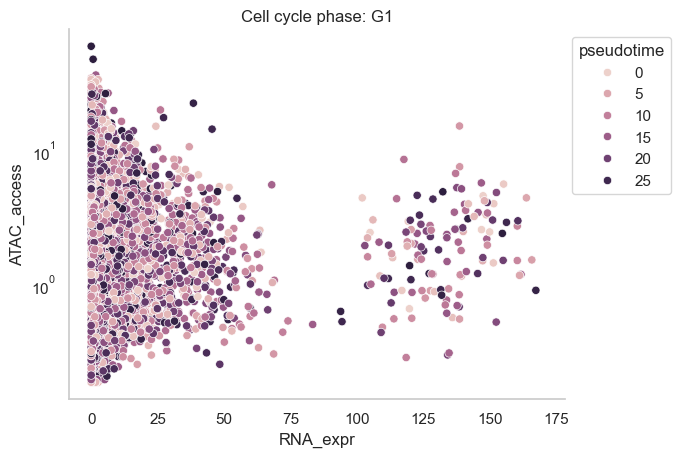

In [27]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.set_style("whitegrid", {'axes.grid' : False})

fig, ax = plt.subplots()

g = sns.scatterplot(
    data=full_cell_data_G1,
    x='RNA_expr',
    y='ATAC_access',
    hue='pseudotime',
    ax=ax,
)

# ax.set_xlim(-1,275)
# ax.set_ylim(-1,250)
ax.set_title('Cell cycle phase: G1')
ax.set_yscale('log')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

sns.despine()
plt.savefig('Figs/ATTvsEXP_G1.png',
            bbox_inches='tight')

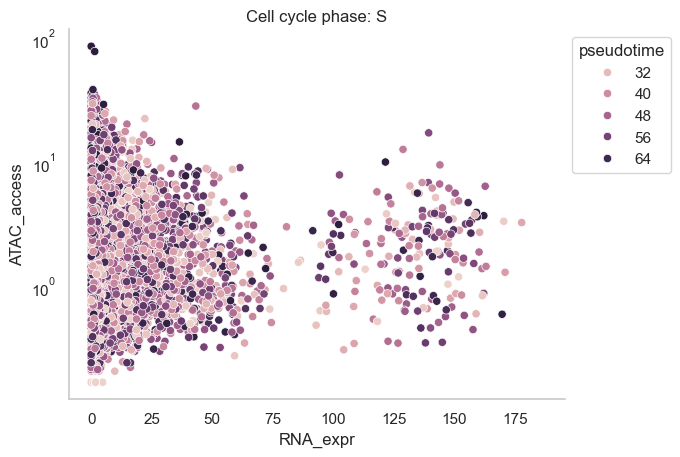

In [28]:
fig, ax = plt.subplots()

g = sns.scatterplot(
    data=full_cell_data_S,
    x='RNA_expr',
    y='ATAC_access',
    hue='pseudotime',
    ax=ax,
)

# ax.set_xlim(-1,275)
# ax.set_ylim(-1,250)
ax.set_title('Cell cycle phase: S')
ax.set_yscale('log')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

sns.despine()
plt.savefig('Figs/ATTvsEXP_S.png',
            bbox_inches='tight')

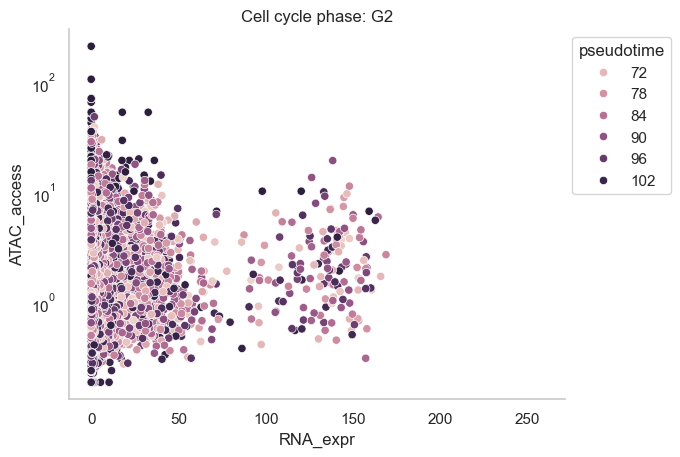

In [29]:
fig, ax = plt.subplots()

g = sns.scatterplot(
    data=full_cell_data_G2,
    x='RNA_expr',
    y='ATAC_access',
    hue='pseudotime',
    ax=ax,
)

# ax.set_xlim(-1,275)
# ax.set_ylim(-1,250)
ax.set_title('Cell cycle phase: G2')
ax.set_yscale('log')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

sns.despine()
plt.savefig('Figs/ATTvsEXP_G2.png',
            bbox_inches='tight')

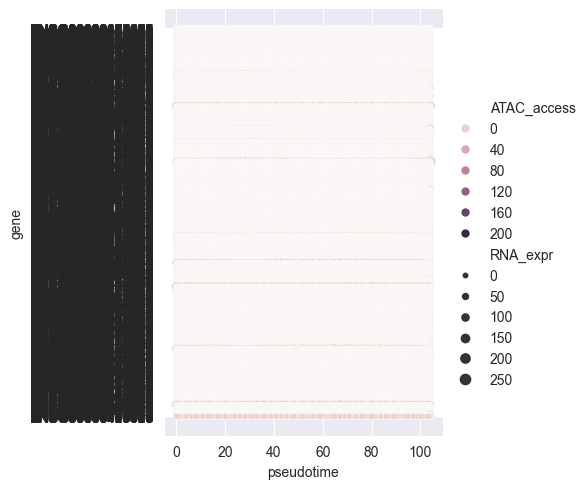

In [11]:
# p = plt.figure(20,10)

sns.relplot(
    data=full_cell_data,
    x='pseudotime',
    y='gene',
    hue='ATAC_access',
    size='RNA_expr',
    
)